## Sketch of retrieval setup

In [2]:
import os
import numpy as np

os.environ["LIRAS_PATH"] = "/home/simonpf/src/joint_flight"
os.environ["ARTS_DATA_PATH"] = "/home/simonpf/src/arts_xml"
os.environ["ARTS_BUILD_PATH"] = "/home/simonpf/build/arts_fast"

from IPython import get_ipython
ip = get_ipython()
if not ip is None:
    ip.magic("%load_ext autoreload")
    ip.magic("%autoreload 2")

from parts.utils.data_providers import NetCDFDataProvider
import mcrf.liras.setup
import mcrf.liras
from   mcrf.retrieval        import CloudRetrieval
from   mcrf.sensors          import mwi, ici, lcpr
from   mcrf.liras  import snow, h2o_a_priori, cloud_water_a_priori, h2o_a_priori
from   mcrf.liras.single_species import ice, rain
from   mcrf.liras.model_data import ModelDataProvider

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#
# Input data.
#

filename = os.path.join(mcrf.liras.liras_path, "data", "forward_simulations_a_noise.nc")
offsets = {"a" : 3000,
           "b" : 2200}
scene = filename.split("_")[-2]
offset = offsets[scene]
observations = NetCDFDataProvider(filename)
observations.add_offset("profile", -offset)
shape = "8-ColumnAggregate"

#
# Create the data provider.
#

ip = offset + 200
data_provider = ModelDataProvider(99,
                                  ice_psd    = ice.psd,
                                  snow_psd   = snow.psd,
                                  scene = scene.upper())
#
# Define hydrometeors and sensors.
#

#hydrometeors = [snow, ice, rain]
hydrometeors = [ice, rain]
sensors      = [lcpr]

#
# Add a priori providers.
#

observation_error = mcrf.liras.ObservationError(sensors,
                                                forward_model_error = True,
                                                scene = scene)
observation_error.noise_scaling["lcpr"] = 2.0

data_provider.add(ice.a_priori[0])
data_provider.add(ice.a_priori[1])
data_provider.add(snow.a_priori[0])
data_provider.add(snow.a_priori[1])
data_provider.add(rain.a_priori[0])
data_provider.add(rain.a_priori[1])
data_provider.add(h2o_a_priori)
data_provider.add(cloud_water_a_priori)
data_provider.add(observation_error)
data_provider.add(observations)


#
# Run the retrieval.
#

retrieval = CloudRetrieval(hydrometeors, sensors, data_provider)
retrieval.setup()
retrieval.run(ip)

ARTS[94019549851056]: Executing /home/simonpf/src/arts_wip/controlfiles/general/general.arts
ARTS[94019549851056]: {
ARTS[94019549851056]: - verbosityInit
ARTS[94019549851056]: - ArrayOfStringSet
ARTS[94019549851056]: - MatrixSet
ARTS[94019549851056]: - Tensor4SetConstant
ARTS[94019549851056]: - ArrayOfStringSet
ARTS[94019549851056]: - Touch
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - ArrayOfStringSet
ARTS[94019549851056]: - MatrixSet
ARTS[94019549851056]: - NumericSet
ARTS[94019549851056]: - ArrayOfStringSet
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - Tensor3SetConstant
ARTS[94019549851056]: - IndexSet
ARTS[94019549851056]: - IndexSet
ARTS[94019549851056]: - IndexSet
ARTS[94019549851056]: - IndexSet
ARTS[94019549851056]: - FlagOff
ARTS[94019549851056]: - output_file_form

ARTS[94019549851056]: - ReadXML

ARTS[94019549851056]: - ReadXML

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Delete

ARTS[94019549851056]: - Delete

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - ReadXML

ARTS[94019549851056]: - ReadXML

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Delete

ARTS[94019549851056]: - Delete

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Append

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - TessemNNReadAscii

ARTS[94019549851056]: - TessemNNReadAscii

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - ReadXML

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

ARTS[94019549851056]: - Copy

A

In [4]:
%env LIRAS_PATH=/old/projects/LIRAS/Development/liras
%load_ext autoreload
%autoreload 2
from mcrf.utils.setup_notebook import *
from netCDF4 import Dataset
from mcrf.liras import liras_path
from mcrf.liras.model_data import ModelDataProvider
from mcrf.liras.results import get_results, get_reference_data

env: LIRAS_PATH=/old/projects/LIRAS/Development/liras
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
reference_a = get_reference_data(scene = "a", i_start = 2800, i_end = 3600)
reference_b = get_reference_data(scene = "b", i_start = 2200, i_end = 3000)

/home/simonpf/src/parts/parts/scattering/psd/my05.py:208: RuntimeWarning: divide by zero encountered in true_divide
  / gamma((nu + 1) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:208: RuntimeWarning: invalid value encountered in true_divide
  / gamma((nu + 1) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:280: RuntimeWarning: divide by zero encountered in power
  m = n0 / mu * lmbd ** (-(nu + p + 1) / mu) * gamma((nu + 1.0 + p) / mu)
/home/simonpf/src/parts/parts/scattering/psd/my05.py:280: RuntimeWarning: invalid value encountered in multiply
  m = n0 / mu * lmbd ** (-(nu + p + 1) / mu) * gamma((nu + 1.0 + p) / mu)
/home/simonpf/src/parts/parts/scattering/psd/d14.py:412: RuntimeWarning: invalid value encountered in true_divide
  dm = m4 / m3
/home/simonpf/src/parts/parts/scattering/psd/d14.py:414: RuntimeWarning: invalid value encountered in true_divide
  n0 = 4.0 ** 4 / (np.pi * self.rho) * md / dm ** 4


In [6]:
hmcs = [[reference_a[k] for k in ["iwc", "swc", "gwc", "hwc", "lwc", "rwc"]]]
hmcs += [[reference_b[k] for k in ["iwc", "swc", "gwc", "hwc", "lwc", "rwc"]]]

In [7]:
from matplotlib.patches import Rectangle
Rectangle?

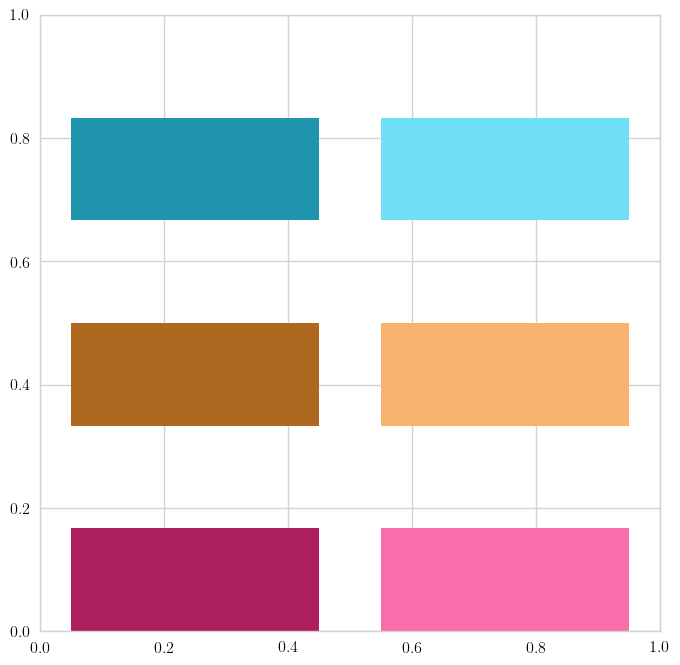

In [8]:
from matplotlib.patches import Rectangle
from seaborn import set_hls_values

fig, ax = plt.subplots()
color_cycle = ax._get_lines.prop_cycler

cs = [next(color_cycle)["color"] for i in range(3)]
cs = [set_hls_values(c, l = 0.4, s = 0.7) for c in cs]
cs_bright = [set_hls_values(c, l = 0.7, s = 0.9) for c in cs]

for i, c in enumerate(cs):
    h = 1.0 / (2 * len(cs))
    r = Rectangle((0.05, i * 2 * h), 0.4, h, facecolor = c)
    ax.add_artist(r)
    
for i, c in enumerate(cs_bright):
    h = 1.0 / (2 * len(cs))
    r = Rectangle((0.55, i * 2 * h), 0.4, h, facecolor = c)
    ax.add_artist(r)

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


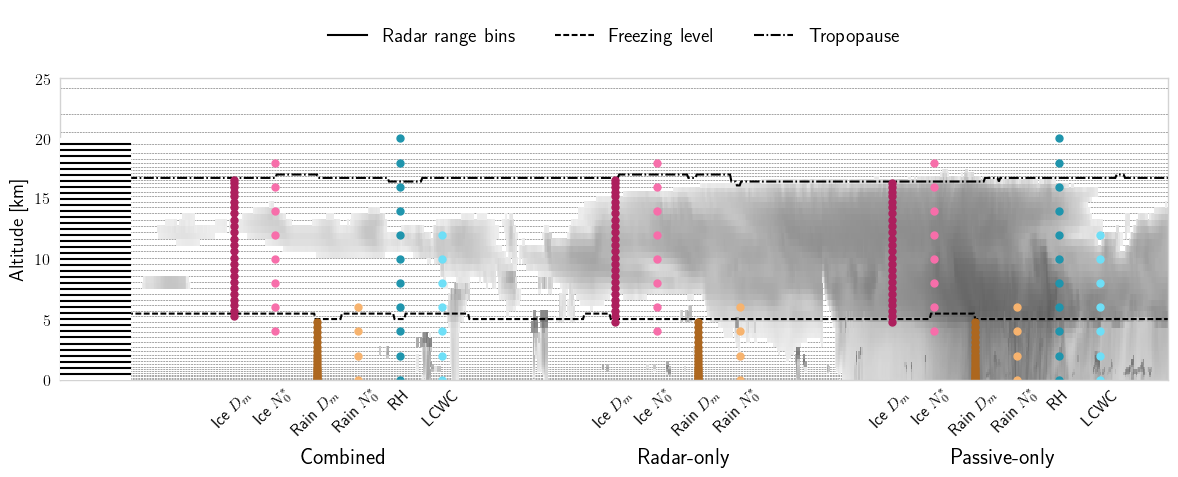

In [13]:
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
from matplotlib.cm import bone_r, Greys
from matplotlib import rcParams
from matplotlib import patches
from mcrf.liras import z_grid
z_grid = z_grid / 1e3

rcParams["ytick.left"] = False
rcParams["xtick.bottom"] = False

f = plt.figure(figsize = (12, 5))
gs = GridSpec(2, 1, height_ratios = [0.05, 1.0])
ax = plt.subplot(gs[1])
x  = reference_a["lat"]
y  = reference_a["z"] / 1e3
z = sum(hmcs[0])
z[z < 5e-6] = np.nan
ax.pcolormesh(x, y, z.T, norm = LogNorm(1e-6, 1e-1), cmap = Greys)


for z in y:
    ax.axhline(z, ls = "--", c = "grey", lw = 0.5, zorder = -10)
    
ax.set_ylabel("Altitude [km]")

markersize = 5

colors = ["#2171b5", "#6baed6", "#cb181d", "#fb6a4a", 
         "#6a51a3", "#9e9ac8"]
colors = []
for i in range(3):
    colors += [cs[i]]
    colors += [cs_bright[i]]

###############################################################################################################################################################
# Retrieval domain
###############################################################################################################################################################

handles = []
# Melting layer
t = reference_a["temperature"]
z_fl = np.zeros(800)
for i in range(800):
    ind = np.where(t[i, :] < 273.15)[0][0]
    z_fl[i] = 0.5 * (y[ind] + y[ind-1])

# Tropopause
z_tp = np.zeros(800)
for i in range(800):
    ti = t[i, :]
    t_avg = 0.5 * (ti[1:] + ti[:-1])
    lr    = - np.diff(ti)
    tp = np.where(np.logical_and(lr < 0, t_avg < 220))[0]
    inds  = np.ones(ti.size, dtype = np.bool)
    if len(tp > 0):
        j     = np.where(np.logical_and(lr < 0, t_avg < 220))[0][0]
        inds[j : inds.size] = False
    ind = np.where(~inds)[0][0]
    z_tp[i] = 0.5 * (y[ind] + y[ind + 1])
    
handles += ax.plot(x, z_fl, ls = "--", c = "k")
handles += ax.plot(x, z_tp, ls = "-.", c = "k")

###############################################################################################################################################################
# Radar bins
###############################################################################################################################################################

rect = patches.Rectangle((x[0],0.0), x[50] - x[0], 20, zorder=20,
                         linewidth=1,edgecolor='white',facecolor='white')
ax.add_patch(rect)
for rb in np.arange(500, 20e3, 500):
    h = ax.plot([x[0], x[50]], [rb/1e3, rb/1e3], ls = "-", c = "k", zorder = 21)
handles.insert(0, h[0])


###############################################################################################################################################################
# Combined
###############################################################################################################################################################

# Ice D_m
i = 125
z_ice_dm = y[ice.a_priori[1].mask(data_provider, i + 2800)]
x_ice_dm = np.array([x[i]] * z_ice_dm.size)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize,
        ls = "", c = colors[0])
# Ice N_0
i += 30
z_ice_n0 = z_grid[ice.a_priori[0]._get_mask(data_provider, i + 2800)]
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize,
        ls = "", c= colors[1])


# Rain_ D_m
i += 30
z_rain_dm = y[rain.a_priori[1].mask(data_provider, i + 2800)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize,
        ls = "", c=colors[2])
# Rain N_0
i += 30
z_rain_n0 = z_grid[rain.a_priori[0]._get_mask(data_provider, i + 2800)]
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize,
        ls = "", c=colors[3])

# Humdity
i += 30
z_rh = z_grid[h2o_a_priori._get_mask(data_provider, i + 2800)]
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = markersize, ls = "",
        c=colors[4])

# Liquid cloud
i += 30
cloud_water_a_priori.owner = data_provider
z_cw = z_grid[cloud_water_a_priori._get_mask(data_provider, i + 2800)]

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = markersize, ls = "",
        c=colors[5])

###############################################################################################################################################################
# Radar only
###############################################################################################################################################################

# Ice D_m
i = 400
z_ice_dm = y[ice.a_priori[1].mask(data_provider, i + 2800)]
x_ice_dm = np.array([x[i]] * z_ice_dm.size)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize, ls = "",
        c =colors[0])
# Ice N_0
i += 30
z_ice_n0 = z_grid[ice.a_priori[0]._get_mask(data_provider, i + 2800)]
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize,
        ls = "", c=colors[1])


# Rain_ D_m
i += 30
z_rain_dm = y[rain.a_priori[1].mask(data_provider, i + 2800)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize,
        ls = "", c=colors[2])
# Rain N_0
i += 30
z_rain_n0 = z_grid[rain.a_priori[0]._get_mask(data_provider, i + 2800)]
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize,
        ls = "", c=colors[3])

ax.set_xticks([])
ax.grid(None)


###############################################################################################################################################################
# Passive only
###############################################################################################################################################################

from mcrf.liras.passive_only import rh_a_priori, cloud_water_a_priori
from mcrf.liras.passive_only_single_species import (rain_dm_a_priori, rain_n0_a_priori,
                                                    ice_dm_a_priori, ice_n0_a_priori)
ice_n0_a_priori.owner = data_provider
rain_n0_a_priori.owner = data_provider

# Ice D_m
i = 600
z_ice_dm = y[ice_dm_a_priori.mask(data_provider, i + 2800)]
x_ice_dm = np.array([x[i]] * z_ice_dm.size)
ax.plot(x_ice_dm, z_ice_dm, marker = "o", markersize = markersize,
        ls = "",c=colors[0])

# Ice N_0
i += 30
z_ice_n0 = z_grid[ice_n0_a_priori._get_mask(data_provider, i + 2800)]
x_ice_n0 = np.array([x[i]] * z_ice_n0.size)
ax.plot(x_ice_n0, z_ice_n0, marker = "o", markersize = markersize,
        ls = "", c=colors[1])


# Rain_ D_m
i += 30
z_rain_dm = y[rain_dm_a_priori.mask(data_provider, i + 2800)]
x_rain_dm = np.array([x[i]] * z_rain_dm.size)
ax.plot(x_rain_dm, z_rain_dm, marker = "o", markersize = markersize,
        ls = "", c=colors[2])

# Rain N_0
i += 30
z_rain_n0 = z_grid[rain_n0_a_priori._get_mask(data_provider, i + 2800)]
x_rain_n0 = np.array([x[i]] * z_rain_n0.size)
ax.plot(x_rain_n0, z_rain_n0, marker = "o", markersize = markersize,
        ls = "", c=colors[3])

# Humdity
i += 30
h2o_a_priori.owner = data_provider
z_rh = z_grid[h2o_a_priori._get_mask(data_provider, i + 2800)]
x_rh = np.array([x[i]] * z_rh.size)
ax.plot(x_rh, z_rh, marker = "o", markersize = markersize,
        ls = "", c=colors[4])

# Liquid cloud
i += 30
cloud_water_a_priori.owner = data_provider
z_cw = z_grid[cloud_water_a_priori._get_mask(data_provider, i + 2800)]

x_cw = np.array([x[i]] * z_cw.size)
ax.plot(x_cw, z_cw, marker = "o", markersize = markersize,
        ls = "", c=colors[5])

ax.set_xticks([])
ax.grid(None)

###############################################################################################################################################################
# Ticks
###############################################################################################################################################################

inds = [125 + i for i in range(0, 160, 30)]
inds += [400 + i for i in range(0, 100, 30)]
inds += [600 + i for i in range(0, 160, 30)]
xs = x[inds]
labels = ["Ice $D_m$", "Ice $N_0^*$", "Rain $D_m$", "Rain $N_0^*$", "RH", "LCWC"]

min_locator = FixedLocator(x[inds])
min_formatter = FixedFormatter(labels + labels[:4] + labels)
maj_locator = FixedLocator(x[[205, 450, 680]])
maj_formatter = FixedFormatter(["Combined", "Radar-only", "Passive-only"])

ax.xaxis.set_minor_locator(min_locator)
ax.xaxis.set_minor_formatter(min_formatter)
ax.xaxis.set_major_locator(maj_locator)
ax.xaxis.set_major_formatter(maj_formatter)
ax.set_ylim([0, 25])

ax.xaxis.set_tick_params("major", labelrotation = 0, labelsize = 16, pad = 45)
ax.xaxis.set_tick_params("minor", labelrotation = 45)

ax = plt.subplot(gs[0])
ax.set_axis_off()
labels = ["Radar range bins", "Freezing level", "Tropopause"]
ax.legend(handles = handles, labels = labels, loc = "upper center", ncol = 3)

plt.tight_layout()


f.savefig("../../plots/retrieval_sketch.png", dpi = 300, bbox_inches = "tight")